# 09 Introducción a Redes Neuronales con PyTorch

- Definiciones básicas de PyTorch
- Representación de arquitecturas básicas

## Versión v.1

- Conceptos básicos
- Redes neuronales en PyTorch
- Estructurado: Ejemplo clase
- Functiones custom
- Ver Red

El notebook lo puedo modificar, esta versión es la v.1 a 15/01/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]


* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Conceptos básicos

In [ ]:
import torch

## Tensores

Un [Tensor](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) es simplemente una generalización de un vector en álgebra lineal implementado para PyTorch.

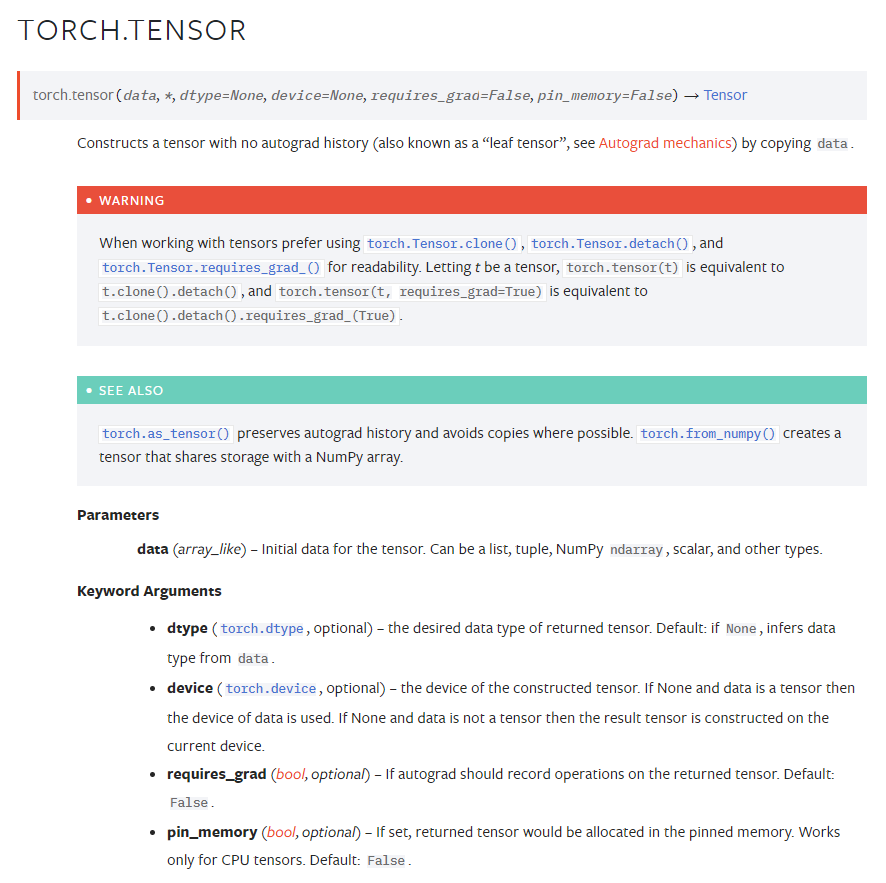

In [ ]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [ ]:
torch.tensor([0, 1])  # Type inference on data

tensor([0, 1])

In [ ]:
torch.tensor([[0.11111, 0.222222, 0.3333333]],
             dtype=torch.float64,
             device=torch.device('cuda:0'))  # creates a double tensor on a CUDA device

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [ ]:
torch.tensor(3.14159)  # Create a zero-dimensional (scalar) tensor

tensor(3.1416)

In [ ]:
torch.tensor([])  # Create an empty tensor (of size (0,))

tensor([])

In [ ]:


# Crear un tensor de números enteros de 1D
tensor_2d_a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_2d_a + tensor_2d

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


Forma del tensor: torch.Size([2, 2])
Tipo de datos del tensor: torch.float32


In [ ]:
resultado

tensor([[2., 4.],
        [6., 8.]], device='cuda:0')

In [ ]:
tensor_2d_a

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
tensor_2d

tensor([[1., 2.],
        [3., 4.]])

## Operaciones básicas sobre tensores

### Operaciones matemáticas elementales
- `torch.add()`: Suma dos tensores elemento por elemento.
- `torch.sub()`: Resta dos tensores elemento por elemento.
- `torch.mul()`: Multiplica dos tensores elemento por elemento.
- `torch.div()`: Divide dos tensores elemento por elemento.
- `torch.pow()`: Eleva un tensor a una potencia especificada.
- `torch.sqrt()`: Calcula la raíz cuadrada de un tensor.
- `torch.exp()`: Calcula la exponencial de un tensor.
- `torch.log()`: Calcula el logaritmo natural de un tensor.

### Reducción de tensores
- `torch.sum()`: Calcula la suma de todos los elementos en un tensor.
- `torch.mean()`: Calcula la media de los elementos en un tensor.
- `torch.max()`: Encuentra el valor máximo en un tensor.
- `torch.min()`: Encuentra el valor mínimo en un tensor.

### Operaciones de álgebra lineal
- `torch.mm()`: Realiza la multiplicación matricial de dos tensores.
- `torch.matmul()`: Realiza la multiplicación de matrices o de tensores multidimensionales.
- `torch.inverse()`: Calcula la matriz inversa de una matriz cuadrada.
- `torch.det()`: Calcula el determinante de una matriz cuadrada.
- `torch.svd()`: Realiza la descomposición de valores singulares (SVD) de una matriz.

### Manipulación de tensores
- `torch.reshape()`: Cambia la forma (shape) de un tensor.
- `torch.transpose()`: Transpone un tensor intercambiando sus dimensiones.
- `torch.cat()`: Concatena varios tensores a lo largo de una dimensión especificada.
- `torch.split()`: Divide un tensor en trozos a lo largo de una dimensión especificada.
- `torch.index_select()`: Selecciona elementos de un tensor según un índice especificado.

### Operaciones booleanas y lógicas
- `torch.eq()`: Compara elementos de dos tensores y devuelve un tensor booleano de igualdad.
- `torch.gt()`, `torch.lt()`, `torch.ge()`, `torch.le()`: Realiza comparaciones de desigualdad elemento por elemento.

Estas son solo algunas de las muchas operaciones disponibles en PyTorch. Consulta la documentación oficial de PyTorch para obtener información más detallada sobre estas operaciones y muchas otras.


### Flatten

In [ ]:
import torch

# Crear un tensor de números enteros de 1D
tensor_1d = torch.tensor([1, 2, 3, 4])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_1d + tensor_2d

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


RuntimeError: The size of tensor a (4) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
import torch

# Crear un tensor de números enteros de 1D
tensor_1d = torch.tensor([1, 2, 3, 4])

# Crear un tensor de números flotantes de 2D (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Realizar operaciones tensoriales
resultado = tensor_1d + tensor_2d.flatten()

# Obtener la forma y el tipo de datos del tensor
print("Forma del tensor:", resultado.shape)
print("Tipo de datos del tensor:", resultado.dtype)

# Mover el tensor a la GPU (si está disponible)
if torch.cuda.is_available():
    resultado = resultado.cuda()


Forma del tensor: torch.Size([4])
Tipo de datos del tensor: torch.float32


In [ ]:
resultado

tensor([2., 4., 6., 8.], device='cuda:0')

## Capa lineal

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
f = nn.Linear(2, 3)
input = torch.randn(10, 2)
output = f(input)
print(output.size())

torch.Size([10, 2])


La primera función es [nn.linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [ ]:
output

tensor([[-0.4034],
        [-0.7146],
        [-0.9463],
        [ 0.0014],
        [-0.4501]], grad_fn=<AddmmBackward0>)

In [ ]:
input

tensor([[-0.2545, -0.1449],
        [-1.6228,  0.1209],
        [ 0.8263, -0.5515],
        [-1.6551, -0.1254],
        [ 0.5426,  0.5314]])

In [ ]:
for x in input:
  print(x.size())

torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])


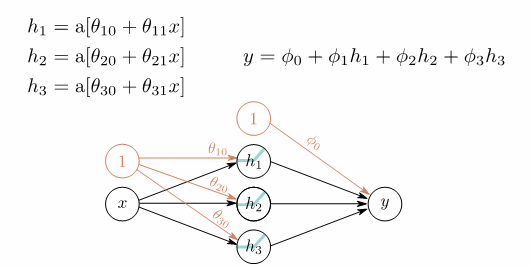

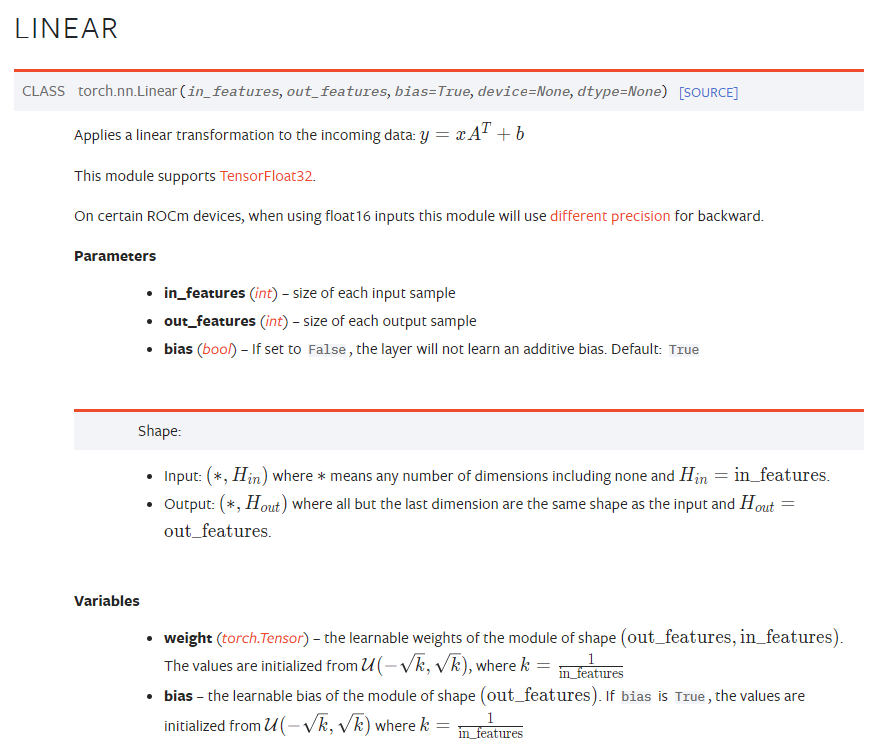

In [ ]:
f.weight

Parameter containing:
tensor([[0.5976, 0.0572]], requires_grad=True)

### Entendiendo las dimensiones

Qué valores puede tomar a, b, c y d

In [ ]:
a, b, c, d = 0, 0, 0, 0
f = nn.Linear(a, b)
input = torch.randn(c, d)
output = f(input)

# Redes neuronales en PyTorch

La lista de [funcionalidades de redes neuronales](https://pytorch.org/docs/stable/nn.html) así como su documentación es el mejor lugar para aprender a usar PyTorch

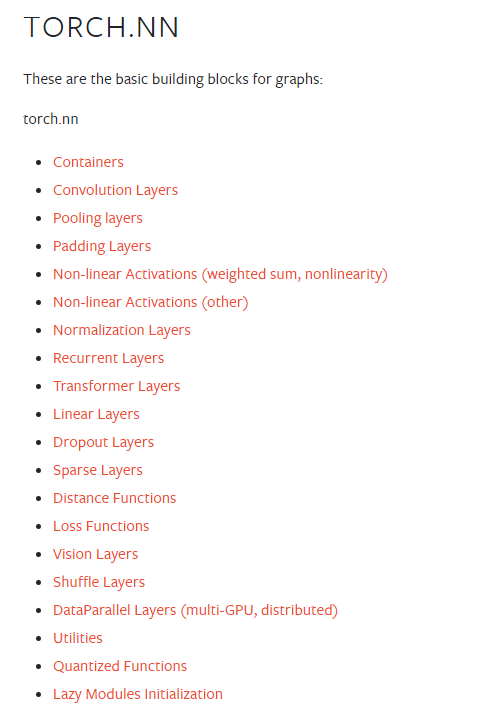

## Funciones de activación

1. **[ReLU (Rectified Linear Unit):](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)** `nn.ReLU()`
   - La función de activación ReLU apaga todos los valores negativos en el tensor y mantiene los valores positivos sin cambios.

2. **[Sigmoid:](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)** `nn.Sigmoid()`
   - La función de activación sigmoidal aplasta los valores de entrada en el rango (0, 1), lo que la hace útil para problemas de clasificación binaria.

3. **Tanh (Tangente hiperbólica):** `nn.Tanh()`
   - La función de activación tangente hiperbólica aplasta los valores de entrada en el rango (-1, 1), y es similar a la sigmoidal pero con una salida centrada en cero.

4. **Softmax:** `nn.Softmax(dim=...)`
   - La función de activación softmax se utiliza típicamente en la capa de salida de una red neuronal para convertir un conjunto de valores en una distribución de probabilidad sobre clases. El argumento `dim` especifica la dimensión a lo largo de la cual se calcula el softmax.

5. **Leaky ReLU:** `nn.LeakyReLU(negative_slope=...)`
   - Similar a ReLU, pero permite que una pequeña pendiente negativa se propague a través de la red, lo que ayuda a prevenir el problema de la "neurona muerta".

6. **ELU (Exponential Linear Unit):** `nn.ELU(alpha=...)`
   - La función ELU es una alternativa a ReLU que permite una pendiente negativa y evita el problema de las "neuronas muertas". El parámetro `alpha` controla la pendiente negativa.

7. **SELU (Scaled Exponential Linear Unit):** `nn.SELU()`
   - SELU es una función de activación que se basa en ELU y se ha demostrado que mejora el entrenamiento de redes neuronales profundas.

8. **Softplus:** `nn.Softplus()`
   - La función de activación Softplus es una versión suave y diferenciable de ReLU, que se utiliza en algunos modelos.

9. **Swish:** `nn.SiLU()`
   - La función de activación Swish es otra función suave y diferenciable que se ha propuesto como alternativa a ReLU.



###  **[ReLU (Rectified Linear Unit):](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)** `nn.ReLU()`

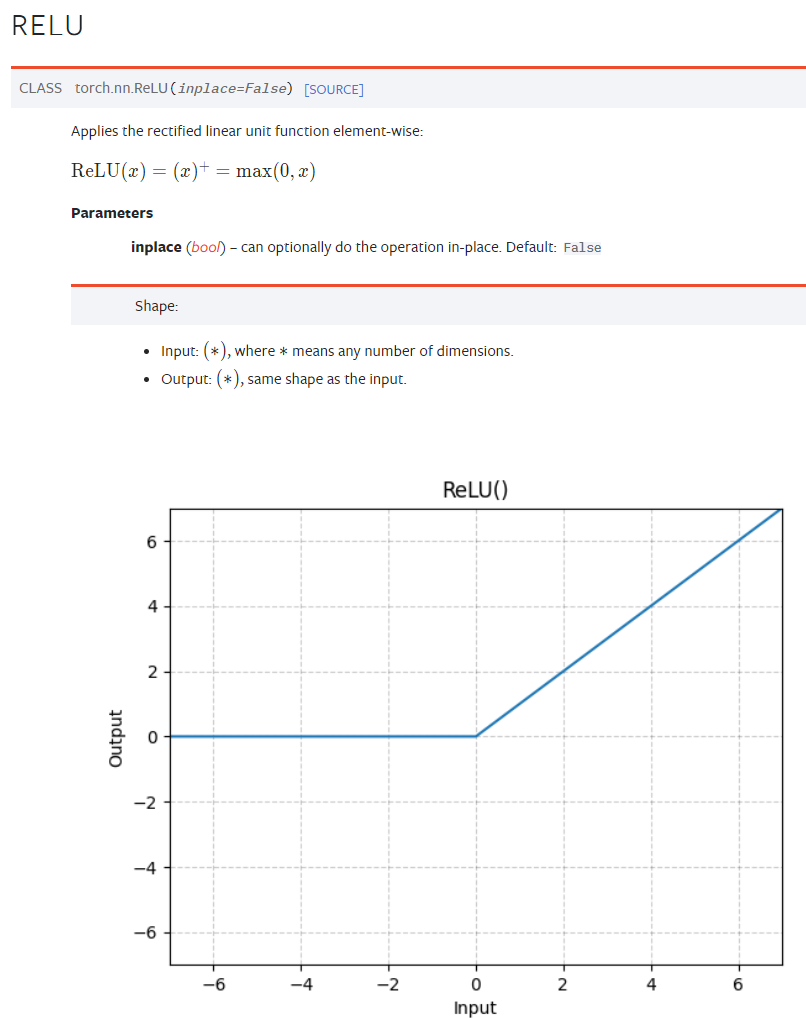

In [ ]:
relu = nn.ReLU()

In [ ]:
input = torch.randn(2)
input

tensor([ 0.6390, -0.7325])

In [ ]:
output = relu(input)
output

tensor([0.6390, 0.0000])

## **Contenedores:** Sequential

Un contenedor es una estructura que nos permite conectar elementos de PyTorch y habilitar funcionalidades importantes dentro de nuestras soluciones como:

1. Composición de funciones
1. Cálculo de derivadas

[Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential) será el contenedor por excelencia para definir nuestras redes neuronales

### Ejemplo de la clase

Recordemos el ejemplo de la clase

Identifiquemos juntos cómo podemos representar esta red neuronal en PyTorch

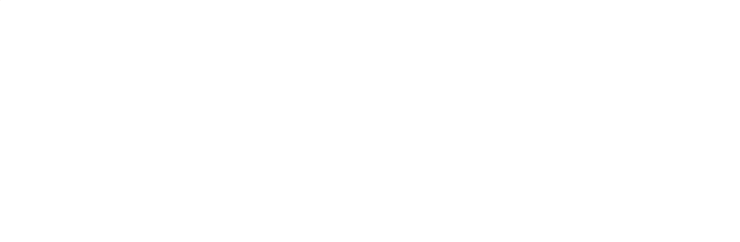

$$
\begin{aligned}
h_1 & =\mathrm{a}\left[\theta_{10}+\theta_{11} x\right] \\
h_2 & =\mathrm{a}\left[\theta_{20}+\theta_{21} x\right] \\
h_3 & =\mathrm{a}\left[\theta_{30}+\theta_{31} x\right]
\end{aligned}
$$

y la función estaba definida como

$$
y=\phi_0+\phi_1 h_1+\phi_2 h_2+\phi_3 h_3
$$

Cuya representación era

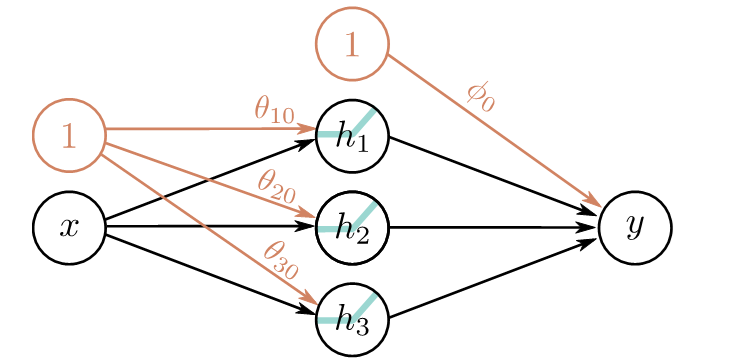

### Solución: Usando Linear y ReLU

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)


In [ ]:
model

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
input = torch.randn(10, 1)
output = model(input)

In [ ]:
input

tensor([[-1.2039],
        [ 0.8871],
        [ 1.1198],
        [-0.1356],
        [ 0.4680],
        [-0.7842],
        [-0.5782],
        [-0.7827],
        [-2.6024],
        [ 0.3443]])

In [ ]:
output

tensor([[0.5687],
        [0.7069],
        [0.7793],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.6003],
        [0.8946]], grad_fn=<AddmmBackward0>)

Veamos cada componente del modelo

Entrada

In [ ]:
model[0]

Linear(in_features=1, out_features=3, bias=True)

In [ ]:
model[0].weight

Parameter containing:
tensor([[ 0.8330],
        [-0.7473],
        [ 0.1766]], requires_grad=True)

In [ ]:
model[0].bias

Parameter containing:
tensor([-0.3512, -0.9805, -0.4119], requires_grad=True)

ReLU

In [ ]:
model[1]

ReLU()

Salida

In [ ]:
model[2]

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
model[2].weight

Parameter containing:
tensor([[ 0.5163,  0.1935, -0.0904]], requires_grad=True)

In [ ]:
model[2].bias

Parameter containing:
tensor([0.5687], requires_grad=True)

In [ ]:
from torch import matmul
from torch import relu

### Intentemos llegar a los cálculos

### Solución

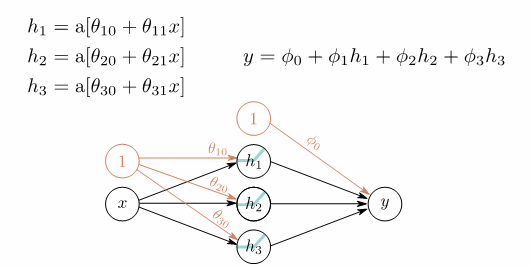

In [ ]:
matmul(input, model[0].weight.T) + model[0].bias

tensor([[-0.2748, -1.0490, -0.3957],
        [-2.2404,  0.7145, -0.8125],
        [ 0.4079, -1.6615, -0.2510],
        [-0.8638, -0.5205, -0.5206],
        [-1.1181, -0.2924, -0.5745],
        [-0.9841, -0.4126, -0.5461],
        [-0.1783, -1.1355, -0.3753],
        [-0.4094, -0.9282, -0.4243],
        [ 0.0613, -1.3505, -0.3245],
        [ 0.6314, -1.8619, -0.2036]], grad_fn=<AddBackward0>)

In [ ]:
relu(matmul(input, model[0].weight.T) + model[0].bias)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.7145, 0.0000],
        [0.4079, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0613, 0.0000, 0.0000],
        [0.6314, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)

In [ ]:
matmul(relu(matmul(input, model[0].weight.T) + model[0].bias), model[2].weight.T) + model[2].bias

tensor([[0.5687],
        [0.7069],
        [0.7793],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.5687],
        [0.6003],
        [0.8946]], grad_fn=<AddBackward0>)

De hecho,

# Estructurado: Ejemplo de clase

In [ ]:
import torch
import torch.nn as nn

# Define un modelo neuronal simple con activación ReLU
class ModeloSimple(nn.Module):
    def __init__(
        self,
        VARIABLES_ENTRADA,
        VARIABLES_SALIDA,
        CAPAS_OCULTAS
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=None,
            out_features=None
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=None,
            out_features=None
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # Aplica la función de activación ReLU
        x = self.fc2(x)
        return x

In [ ]:
# Crea una instancia del modelo
modelo = ModeloSimple(64, 2, 4)

# Ejemplo de entrada
datos_entrada = torch.randn(1, 64)  # Ajusta la forma de entrada según sea necesario

# Pase hacia adelante
salida = modelo(datos_entrada)
print(salida)


## Solución

In [ ]:
import torch
import torch.nn as nn

# Define un modelo neuronal simple con activación ReLU
class ModeloSimple(nn.Module):
    def __init__(
        self,
        VARIABLES_ENTRADA,
        VARIABLES_SALIDA,
        CAPAS_OCULTAS
    ):
        super(ModeloSimple, self).__init__()
        self.fc1 = nn.Linear(
            in_features=VARIABLES_ENTRADA,
            out_features=CAPAS_OCULTAS
        )
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(
            in_features=CAPAS_OCULTAS,
            out_features=VARIABLES_SALIDA
        )

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  # Aplica la función de activación ReLU
        x = self.fc2(x)
        return x



In [ ]:
# Crea una instancia del modelo
modelo = ModeloSimple(64, 2, 4)

# Ejemplo de entrada
datos_entrada = torch.randn(1, 64)  # Ajusta la forma de entrada según sea necesario

# Pase hacia adelante
salida = modelo(datos_entrada)
print(salida)


tensor([[-0.2798, -0.6095]], grad_fn=<AddmmBackward0>)


# **Funciones custom:** Definiendo un Perceptron

Es posible definir pasos en nuestra red con funciones propias

El primer modelo mátematico usando neuronas fue el denominado Threshold Logic Unit, con entradas booleanas:
$$
f(x)=\mathbf{1}_{\left\{ \sum_i w_i x_i+b \geq 0\right\}} .
$$

Puede implementar
$$
\begin{aligned}
\operatorname{or}(u, v) & =\mathbf{1}_{\{u+v-0.5 \geq 0\}} & (w=1, b=-0.5) \\
\text { and }(u, v) & =\mathbf{1}_{\{u+v-1.5 \geq 0\}} & (w=1, b=-1.5) \\
\operatorname{not}(u) & =\mathbf{1}_{\{-u+0.5 \geq 0\}} & (w=-1, b=0.5)
\end{aligned}
$$

### Consecuencia?



**Cualquier** función booleana compuesta por esas unidades puede ser representada usando la TLU

(McCullochandPitts,1943)

### El perceptron

El perceptron es bastante parecido
$$
f(x)=\left\{\begin{array}{lrr}
1 & \text { if } & \sum_i w_i x_i+b \geq 0 \\
0 & \text { en otro caso }
\end{array}\right.
$$
pero las entradas están en los reales y los pesos varían (Rosenblatt, 1957).

Para simplificar cálculos, asumimos la función como $\pm 1$. Sea
$$
\sigma(x)=\left\{\begin{aligned}
1 & \text { if } x \geq 0 \\
-1 & \text { en otro caso }
\end{aligned}\right.
$$

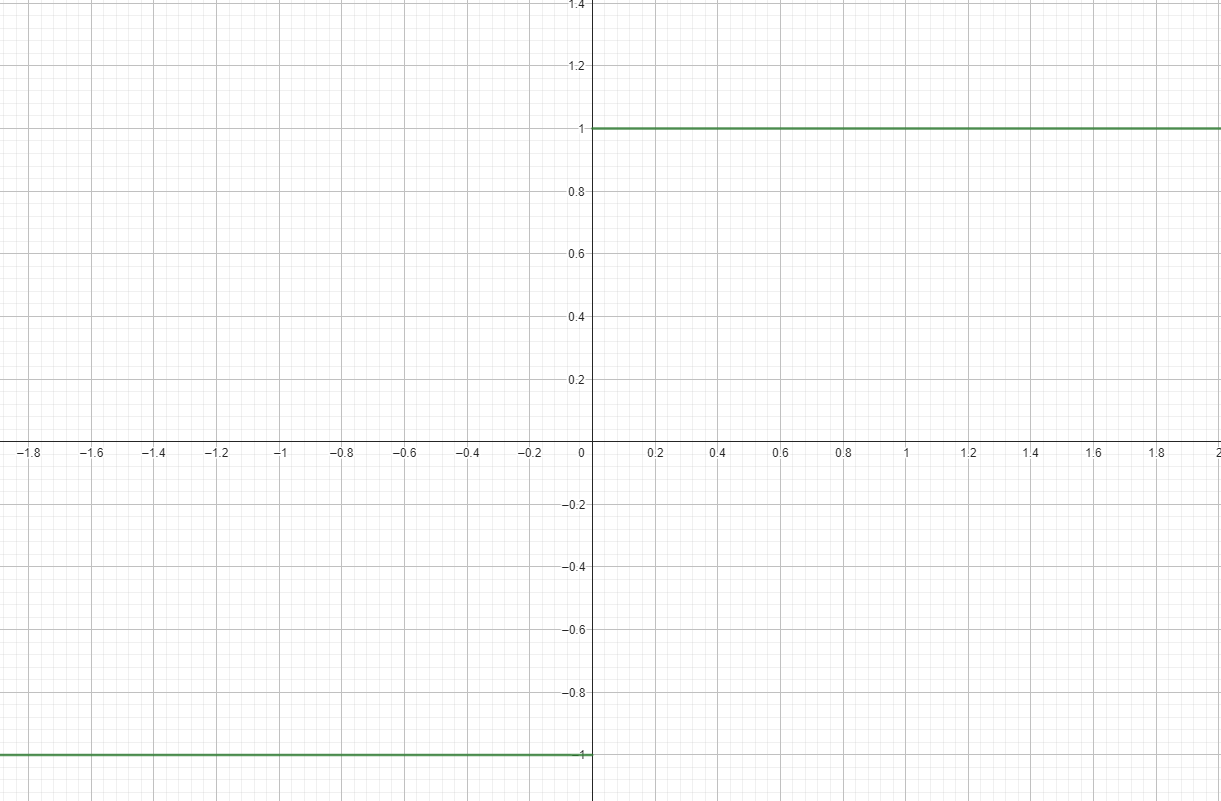

La regla de clasificación para perceptron entonces es:
$$
f(x)=\sigma(w \cdot x+b)
$$

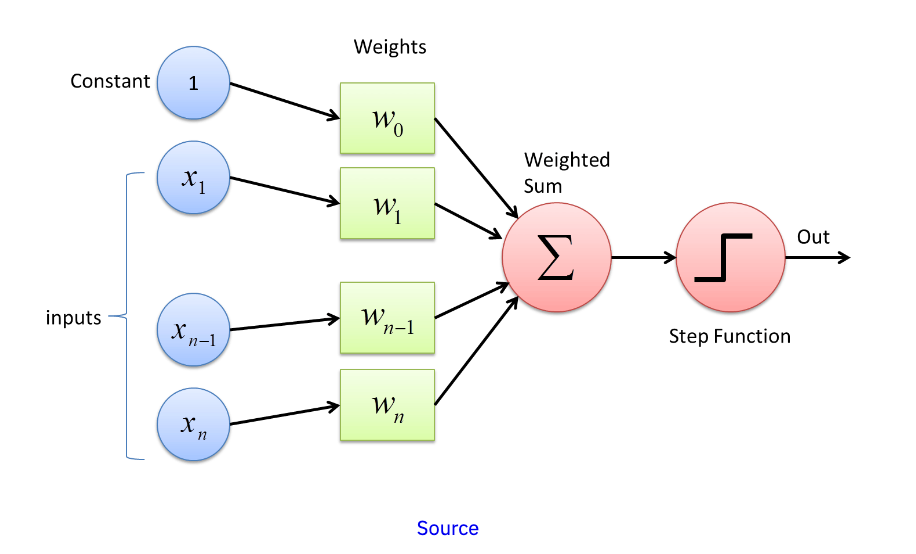

### Función step

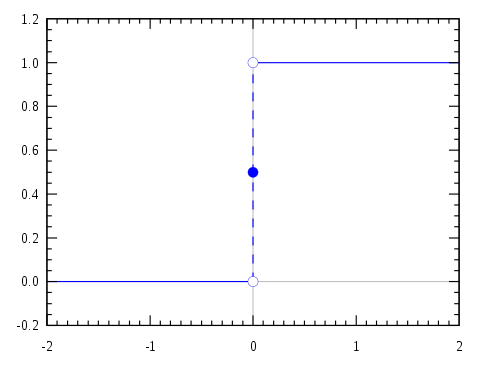

Podemos implementarla usando la función [heaviside
](https://pytorch.org/docs/stable/generated/torch.heaviside.html)

$$
\text { heaviside }(\text { input }, \text { values })= \begin{cases}0, & \text { if input }<0 \\ \text { values }, & \text { if input }==0 \\ 1, & \text { if input }>0\end{cases}
$$

Parameters
 1. input (Tensor) – the input tensor.
 1. values (Tensor) – The values to use where input is zero.

Keyword Arguments
 1. out (Tensor, optional) – the output tensor.

Cómo podríamos implementar esta función de activación?

In [ ]:
class NuestraActivation(nn.Module):
    def __init__(self, values):
        # inicializar método
        super(NuestraActivation, self).__init__()

        # Posibles parámetros
        self.values = values

    # Definición de la función f(x, values)
    def forward(self, x):
        f = None
        return f(x, self.values)

### Solución

In [ ]:
class HeavisideActivation(nn.Module):
    def __init__(self, values):
        super(HeavisideActivation, self).__init__()
        self.values = values

    def forward(self, x):
        return heaviside(x, self.values)


In [ ]:
from collections import OrderedDict
import torch.nn as nn
from torch import heaviside

perceptron = nn.Sequential(OrderedDict([
    ('capa_densa_1', nn.Linear(5, 3)),
    ('salida', HeavisideActivation(values=torch.tensor([0.5]))  )
]))

In [ ]:
input = torch.randn(5, 5)
output = perceptron(input)

In [ ]:
output

tensor([[1., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 1.]], grad_fn=<NotImplemented>)

## Definiendo un MLP (Perceptron de Multiples Capas)





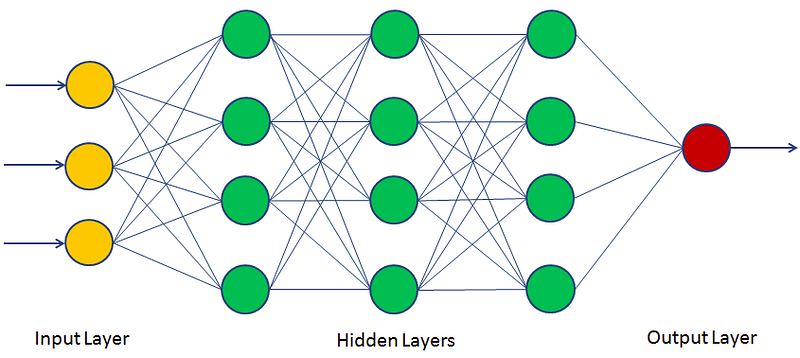

### Solución

In [ ]:
from collections import OrderedDict
import torch.nn as nn

model = nn.Sequential(OrderedDict([
    ('capa_densa_1', nn.Linear(5, 3)),
    ('activacion_1', nn.ReLU()),
    ('capa_densa_2', nn.Linear(3, 5)),
    ('activacion_2', nn.ReLU()),
    ('salida', nn.Linear(5, 2))
]))

In [ ]:
input = torch.randn(5, 5)
output = model(input)

In [ ]:
output

tensor([[-0.0711,  0.3061],
        [-0.0795,  0.2738],
        [-0.0507,  0.2608],
        [-0.0723,  0.3108],
        [-0.0824,  0.2956]], grad_fn=<AddmmBackward0>)

In [ ]:
print(model)

Sequential(
  (capa_densa_1): Linear(in_features=5, out_features=3, bias=True)
  (activacion_1): ReLU()
  (capa_densa_2): Linear(in_features=3, out_features=5, bias=True)
  (activacion_2): ReLU()
  (salida): Linear(in_features=5, out_features=2, bias=True)
  (a(salida)): ReLU()
)


# Ver red

In [ ]:
!pip install torchviz

In [ ]:
import torchviz

In [ ]:
from torchviz import make_dot

make_dot(output, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

# Entrenando la red neuronal

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
import torch
from torch.utils.data import DataLoader, TensorDataset

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Convertir los datos a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [ ]:
y

In [ ]:
# Parámetros de la validación cruzada
num_splits = 5  # Número de divisiones (folds)
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

In [ ]:

# Listas para almacenar resultados de validación cruzada
accuracy_list = []


In [ ]:
# Iterar a través de las divisiones de la validación cruzada
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Crear DataLoader para los conjuntos de entrenamiento y validación
    batch_size = 64
    train_dataset = TensorDataset(X_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_val, y_val)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    # Crear una instancia del modelo
    modelo = ModeloSimple(
        VARIABLES_ENTRADA=X_train.shape[1],
        VARIABLES_SALIDA=2,
        CAPAS_OCULTAS=10
    )

    # Definir el optimizador y la función de pérdida
    optimizer = torch.optim.Adam(modelo.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Entrenamiento (esto es solo un ejemplo, debes ajustar los hiperparámetros)
    num_epochs = 10
    for epoch in range(num_epochs):
        # Aseguramos que el tracking de gradientes está habilitado.
        modelo.train(True)
        total_loss = 0.0
        for inputs, labels in train_dataloader:
            # Para cada input del dataloader, colocar gradientes en cero
            optimizer.zero_grad()

            # Hacer predicciones para el input (batch)
            outputs = modelo(inputs)

            # Calcular los valores de la función de pérdida
            loss = criterion(outputs, labels)

            # Ajustar gradiente
            loss.backward()

            # Ajustar los pesos del modelo
            optimizer.step()

            # Almacenamiento de la función de pérdida
            total_loss += loss.item()

    # Evaluación en el conjunto de validación
    modelo.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            print(labels)
            outputs = modelo(inputs)
            _, predicted = torch.max(outputs.data, 1)
            print(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    accuracy_list.append(accuracy)

    # Imprimir información por época
    print(f'Época {epoch + 1}/{num_epochs}, Pérdida de Entrenamiento: {total_loss:.4f}, Precisión en Validación: {accuracy * 100:.2f}%')


# Calcular el promedio de las precisiones obtenidas en cada división de validación cruzada
average_accuracy = np.mean(accuracy_list)
print(f"Precision promedio en validación cruzada de {num_splits} divisiones: {average_accuracy * 100:.2f}%")


tensor([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])
tensor([[141.7684, 118.4492],
        [ 46.7815,  48.6039],
        [ 43.7320,  47.6234],
        [ 88.0630,  81.0601],
        [ 83.9428,  78.5254],
        [ 56.6616,  55.2220],
        [ 32.0594,  34.5134],
        [ 16.1049,  19.8554],
        [ 60.7764,  59.7419],
        [129.0829, 112.9003],
        [ 84.6383,  75.9567],
        [ 39.9486,  41.4661],
        [115.3046,  97.2436],
        [ 39.6376,  41.9281],
        [ 33.2682,  35.3533],
        [ 35.5550,  38.2577],
        [ 53.4974,  53.3784],
        [ 36.1523,  39.1274],
        [ 53.2840,  53.2141],
        [ 25.0834,  28.1649],
        [ 32.7105,  35.4181],
        [ 33.1064,  36.9308],
        [ 45.7827,  48.4948],
        [ 15.9499,  20.7972],
        [ 37.1296,  38.9673],
        [ 71.9832,  68.5927],
   